In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.drop('RowNumber', axis=1, inplace=True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
churn_df = churn_data.copy()
churn_df['Exited_literal'] = churn_df['Exited'].apply(lambda x: 'Ушедший клиент' if x==1 else 'Лояльный клиент')

C:\Users\chaff\AppData\Local\Temp\ipykernel_11708\1567973266.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


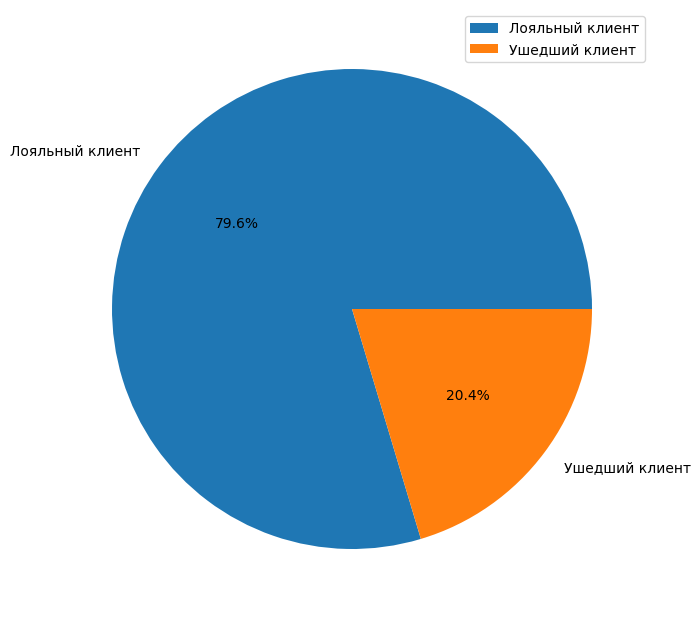

In [ ]:
fig = plt.figure(figsize=(6, 6))
axes=fig.add_axes([0, 0, 1, 1])

axes.pie(
    data=churn_df,
    x=churn_df['Exited_literal'].value_counts(),
    labels=churn_df['Exited_literal'].value_counts().index,
    autopct='%.1f%%'
)
axes.set_
# axes.set_title() — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
# axes.set_xlabel() — название оси абсцисс;
# axes.set_ylabel() — название оси ординат;
# axes.set_xticks() — установка отметок на оси абсцисс;
# axes.set_yticks() — установка отметок на оси ординат;
# axes.xaxis.set_tick_params() — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
# axes.yaxis.set_tick_params() — управление параметрами отметок на оси ординат;
axes.legend()
fig.show()

119839.69
119827.49
1.0


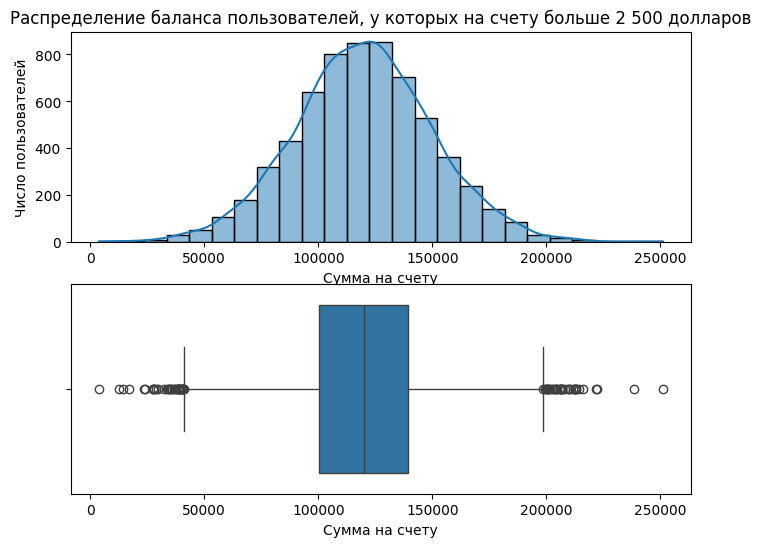

In [15]:
hist_data = churn_df[churn_data['Balance']>2500]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

sns.histplot(
    data=hist_data,
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[0]
)

axes[0].set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов')
axes[0].set_xlabel('Сумма на счету')
axes[0].set_ylabel('Число пользователей')

sns.boxplot(
    data=hist_data,
    x='Balance'
)
axes[1].set_xlabel('Сумма на счету');

mdn = round(hist_data['Balance'].median(), 2)
mn = round(hist_data['Balance'].mean(), 2)
print(mdn, mn, round(mdn/mn, 3), sep='\n')

C:\Users\chaff\AppData\Local\Temp\ipykernel_11708\4026559965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


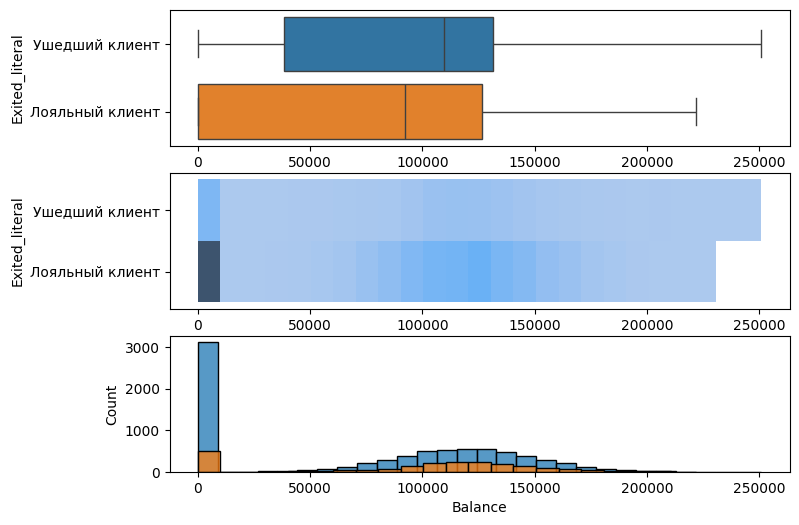

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))

boxplot = sns.boxplot(
    data = churn_df,
    x='Balance',
    y='Exited_literal',
    orient='h',
    palette='tab10',
    ax=axes[0]
);

histplot = sns.histplot(
    data=churn_df,
    x='Balance',
    y='Exited_literal',
    bins=25,
    ax=axes[1]
);

histplot = sns.histplot(
    data=churn_df[churn_df['Exited'] == 0],
    x='Balance',
    bins=25,
    ax=axes[2]
);

histplot = sns.histplot(
    data=churn_df[churn_df['Exited'] == 1],
    x='Balance',
    bins=25,
    ax=axes[2],
    legend=True
);

C:\Users\chaff\AppData\Local\Temp\ipykernel_11708\1838920267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


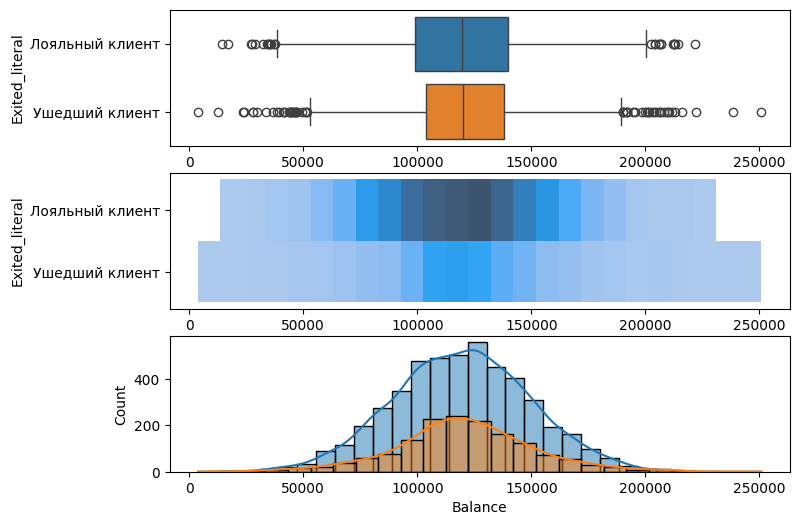

In [91]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))

boxplot = sns.boxplot(
    data = hist_data,
    x='Balance',
    y='Exited_literal',
    orient='h',
    palette='tab10',
    ax=axes[0]
);

histplot = sns.histplot(
    data=hist_data,
    x='Balance',
    y='Exited_literal',
    bins=25,
    ax=axes[1]
);

histplot = sns.histplot(
    data=hist_data[hist_data['Exited'] == 0],
    x='Balance',
    bins=25,
    ax=axes[2],
    kde=True
);

histplot = sns.histplot(
    data=hist_data[hist_data['Exited'] == 1],
    x='Balance',
    bins=25,
    ax=axes[2],
    legend=True,
    kde=True
);